In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from datetime import datetime
import warnings

In [2]:
df = pd.read_excel('../dataset/2023_data_selected.xlsx')

In [3]:
df.head()

,user_id,first_name,last_name,patronymic_name,status,created_at_y,address_registred,description_y,birth_date,gender,...,family_member_count,main_family_expense,state,work_address,work_position,work_salary,employment_type,profession,work_phone_owner,description_x
0,868,Shaxzodbek2,-,-,committee_canceled,2023-09-28 18:55:02,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,867,Shaxzodbek Qambaraliyev,-,-,monitoring_canceled,2023-09-28 18:55:01,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874,ИКРОМОВ,НОДИР,ИБРАГИМОВИЧ,monitoring_canceled,2023-09-28 18:55:02,ЧАРХИЙ,NaN,1988-10-10 00:00:00,male,...,8,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,870,Акмаль,-,-,monitoring,2023-09-28 18:55:02,Кукон шахар,NaN,2021-12-15 00:00:00,female,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,МАМДЖАНОВА,ШАХНОЗАХОН,РУСТАМЖОН КИЗИ,monitoring_canceled,2023-09-28 18:54:38,Дангара Т. Зарбдор 134-уй,33 -6948005 онаси,1996-03-02 00:00:00,female,...,7,2000000.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['user_id', 'first_name', 'last_name', 'patronymic_name', 'status',
       'created_at_y', 'address_registred', 'description_y', 'birth_date',
       'gender', 'phone', 'department', 'education_degree', 'marriage',
       'address_living', 'estimated_address', 'passport', 'pinfl',
       'passport_given_by', 'region', 'district', 'neighborhood',
       'passport_date', 'family_member_count', 'main_family_expense', 'state',
       'work_address', 'work_position', 'work_salary', 'employment_type',
       'profession', 'work_phone_owner', 'description_x'],
      dtype='object')

In [5]:
df['status'].value_counts()

completed              14106
committee_canceled      7902
monitoring_canceled     3061
monitoring              1975
committee                820
new                      301
Name: status, dtype: int64

In [6]:
len(df)

49569

In [7]:
df['status'].isna().sum()

21404

In [8]:
# df["status"] = df["status"].replace({"completed": 0, "committee_canceled": 1, "monitoring_canceled": 1, "monitoring": 1, "committee":1, "new":1,})

In [8]:
allowed_statuses = ['completed', 'committee_canceled', 'monitoring_canceled']

In [9]:
df = df[df['status'].isin(allowed_statuses)]

In [10]:
len(df)

25069

In [11]:
df.head()

,user_id,first_name,last_name,patronymic_name,status,created_at_y,address_registred,description_y,birth_date,gender,...,family_member_count,main_family_expense,state,work_address,work_position,work_salary,employment_type,profession,work_phone_owner,description_x
0,868,Shaxzodbek2,-,-,committee_canceled,2023-09-28 18:55:02,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,867,Shaxzodbek Qambaraliyev,-,-,monitoring_canceled,2023-09-28 18:55:01,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874,ИКРОМОВ,НОДИР,ИБРАГИМОВИЧ,monitoring_canceled,2023-09-28 18:55:02,ЧАРХИЙ,NaN,1988-10-10 00:00:00,male,...,8,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,МАМДЖАНОВА,ШАХНОЗАХОН,РУСТАМЖОН КИЗИ,monitoring_canceled,2023-09-28 18:54:38,Дангара Т. Зарбдор 134-уй,33 -6948005 онаси,1996-03-02 00:00:00,female,...,7,2000000.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,875,ИКРОМОВ,БОХОДИР,РАСУЛОВИЧ,completed,2023-09-28 18:55:02,NaN,NaN,1985-03-22 00:00:00,male,...,6,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df["status"] = df["status"].replace({"completed": 0, "committee_canceled": 1, "monitoring_canceled": 1})

In [13]:
df['status'].value_counts()

0    14106
1    10963
Name: status, dtype: int64

In [14]:
df.head()

,user_id,first_name,last_name,patronymic_name,status,created_at_y,address_registred,description_y,birth_date,gender,...,family_member_count,main_family_expense,state,work_address,work_position,work_salary,employment_type,profession,work_phone_owner,description_x
0,868,Shaxzodbek2,-,-,1,2023-09-28 18:55:02,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,867,Shaxzodbek Qambaraliyev,-,-,1,2023-09-28 18:55:01,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874,ИКРОМОВ,НОДИР,ИБРАГИМОВИЧ,1,2023-09-28 18:55:02,ЧАРХИЙ,NaN,1988-10-10 00:00:00,male,...,8,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,МАМДЖАНОВА,ШАХНОЗАХОН,РУСТАМЖОН КИЗИ,1,2023-09-28 18:54:38,Дангара Т. Зарбдор 134-уй,33 -6948005 онаси,1996-03-02 00:00:00,female,...,7,2000000.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,875,ИКРОМОВ,БОХОДИР,РАСУЛОВИЧ,0,2023-09-28 18:55:02,NaN,NaN,1985-03-22 00:00:00,male,...,6,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
filtered_df = df.dropna(subset=['status'])

In [16]:
filtered_df.head()

,user_id,first_name,last_name,patronymic_name,status,created_at_y,address_registred,description_y,birth_date,gender,...,family_member_count,main_family_expense,state,work_address,work_position,work_salary,employment_type,profession,work_phone_owner,description_x
0,868,Shaxzodbek2,-,-,1,2023-09-28 18:55:02,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,867,Shaxzodbek Qambaraliyev,-,-,1,2023-09-28 18:55:01,NaN,NaN,2021-12-22 00:00:00,NaN,...,0,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874,ИКРОМОВ,НОДИР,ИБРАГИМОВИЧ,1,2023-09-28 18:55:02,ЧАРХИЙ,NaN,1988-10-10 00:00:00,male,...,8,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,МАМДЖАНОВА,ШАХНОЗАХОН,РУСТАМЖОН КИЗИ,1,2023-09-28 18:54:38,Дангара Т. Зарбдор 134-уй,33 -6948005 онаси,1996-03-02 00:00:00,female,...,7,2000000.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,875,ИКРОМОВ,БОХОДИР,РАСУЛОВИЧ,0,2023-09-28 18:55:02,NaN,NaN,1985-03-22 00:00:00,male,...,6,0.0,new,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
len(filtered_df)

25069

In [18]:
nan_counts = filtered_df.isna().sum()

In [25]:
with open("nan_counts.txt", "w") as f:
    f.write(nan_counts.to_string())

In [19]:
filtered_df.isna().sum()

user_id                    0
first_name                 0
last_name                  0
patronymic_name            0
status                     0
created_at_y               0
address_registred         13
description_y           5664
birth_date               393
gender                   388
phone                    614
department             25045
education_degree           0
marriage                   0
address_living            29
estimated_address        814
passport                   0
pinfl                  17517
passport_given_by      11808
region                 17529
district               17529
neighborhood           17848
passport_date          17512
family_member_count        0
main_family_expense        0
state                      0
work_address           13395
work_position          12257
work_salary            17533
employment_type        17533
profession             25069
work_phone_owner       17535
description_x          21490
dtype: int64

In [20]:
filtered_df[['address_living', 'estimated_address', 'address_registred', 'state']]

,address_living,estimated_address,address_registred,state
0,NaN,NaN,NaN,new
1,NaN,NaN,NaN,new
2,ЧАРХИЙ,ЧАРХИЙ БОЗОР,ЧАРХИЙ,new
4,Дангара Т. Зарбдор 134-уй,Гимназия олдида (дангара ),Дангара Т. Зарбдор 134-уй,new
5,ЧАРХИЙ,БОЗОР ЧАРХИЙ,NaN,new
...,...,...,...,...
49503,Кукон шахар Бахмалбоб 57 уй,Шалдирамок масжиди олдида,КУКОН ШАХАР 2 МФЙ,new
49504,50-мфй А Т Хукандий 31-32/24,20-мактаб оркаси,Кукон ш АТХ 31-32/24,new
49511,Учк-т Тожик МФЙ Курбозор киш Боги бустон 7-уй,23-макта утилади,Учк-т Тожик МФЙ Курбозор киш Боги бустон 7-уй,new
49512,Узбекистон тум Кудаш МФЙ Янги махалла,Прапан запрафкага йетмасдан кучада,Узбекистон тум Кудаш МФЙ Янги махалла,new


In [21]:
filtered_df['birth_date'] = pd.to_datetime(filtered_df['birth_date'], errors='coerce')

In [22]:
filtered_df['year'] = filtered_df['birth_date'].dt.year

In [23]:
filtered_df['year'].head()

0    2021.0
1    2021.0
2    1988.0
4    1996.0
5    1985.0
Name: year, dtype: float64

In [24]:
selected = filtered_df[['status', 'gender', 'year', 'education_degree', 'marriage', 'family_member_count', 'main_family_expense', 'state']]

In [25]:
selected.head()

,status,gender,year,education_degree,marriage,family_member_count,main_family_expense,state
0,1,NaN,2021.0,low,no,0,0.0,new
1,1,NaN,2021.0,low,no,0,0.0,new
2,1,male,1988.0,high,no,8,0.0,new
4,1,female,1996.0,middle,no,7,2000000.0,new
5,0,male,1985.0,high,no,6,0.0,new


In [26]:
selected.isna().sum()

status                   0
gender                 388
year                   429
education_degree         0
marriage                 0
family_member_count      0
main_family_expense      0
state                    0
dtype: int64

In [27]:
selected = selected.dropna(subset=['gender', 'year'])

In [28]:
selected.isna()

,status,gender,year,education_degree,marriage,family_member_count,main_family_expense,state
2,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
49503,False,False,False,False,False,False,False,False
49504,False,False,False,False,False,False,False,False
49511,False,False,False,False,False,False,False,False
49512,False,False,False,False,False,False,False,False


In [29]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24638 entries, 2 to 49514
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               24638 non-null  int64  
 1   gender               24638 non-null  object 
 2   year                 24638 non-null  float64
 3   education_degree     24638 non-null  object 
 4   marriage             24638 non-null  object 
 5   family_member_count  24638 non-null  object 
 6   main_family_expense  24638 non-null  float64
 7   state                24638 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


In [30]:
selected['family_member_count'] = pd.to_numeric(selected['family_member_count'], errors='coerce')

In [31]:
selected['family_member_count'].dtype

dtype('int64')

In [32]:
obj_df=selected.select_dtypes(include=['object']).copy()

In [33]:
obj_df.head()

,gender,education_degree,marriage,state
2,male,high,no,new
4,female,middle,no,new
5,male,high,no,new
6,female,low,yes,regular
8,female,low,no,new


In [34]:
obj_df.nunique()

gender              2
education_degree    3
marriage            2
state               2
dtype: int64

In [35]:
def find_unique(col):
  print(col,":",obj_df[col].unique())
for col in obj_df.columns:
  find_unique(col)

gender : ['male' 'female']
education_degree : ['high' 'middle' 'low']
marriage : ['no' 'yes']
state : ['new' 'regular']


In [36]:
# shuffle the DataFrame rows
selected = selected.sample(frac = 1)

In [37]:
# encode the categorical values into numeric values
le=LabelEncoder()
for col in obj_df.columns:
    selected[col]=le.fit_transform(selected[col])
selected.head()

,status,gender,year,education_degree,marriage,family_member_count,main_family_expense,state
46992,1,1,1992.0,1,1,4,1600000.0,0
11100,0,1,1989.0,1,1,4,1500000.0,0
14471,0,1,1999.0,2,0,4,1600000.0,1
16888,1,1,1990.0,2,1,4,1500000.0,0
15833,1,1,2001.0,2,1,5,2000000.0,0


Outlier Detection

In [38]:
# find outlier in all columns
for i in selected.select_dtypes(include=['float64','int64']).columns:
  max_thresold=selected[i].quantile(0.95)
  min_thresold=selected[i].quantile(0.05)
  credit_df_no_outlier=selected[(selected[i] < max_thresold) & (selected[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((selected.shape[0]-credit_df_no_outlier[0])/selected.shape[0])*100),"%")
     

 outlier in  status is 100 %
 outlier in  gender is 100 %
 outlier in  year is 10 %
 outlier in  education_degree is 100 %
 outlier in  marriage is 100 %
 outlier in  family_member_count is 11 %
 outlier in  main_family_expense is 10 %
 outlier in  state is 100 %


In [39]:
selected.head()

,status,gender,year,education_degree,marriage,family_member_count,main_family_expense,state
46992,1,1,1992.0,1,1,4,1600000.0,0
11100,0,1,1989.0,1,1,4,1500000.0,0
14471,0,1,1999.0,2,0,4,1600000.0,1
16888,1,1,1990.0,2,1,4,1500000.0,0
15833,1,1,2001.0,2,1,5,2000000.0,0


In [40]:
selected.reset_index(inplace=True)
selected.head()

,index,status,gender,year,education_degree,marriage,family_member_count,main_family_expense,state
0,46992,1,1,1992.0,1,1,4,1600000.0,0
1,11100,0,1,1989.0,1,1,4,1500000.0,0
2,14471,0,1,1999.0,2,0,4,1600000.0,1
3,16888,1,1,1990.0,2,1,4,1500000.0,0
4,15833,1,1,2001.0,2,1,5,2000000.0,0


In [41]:
len(selected)

24638

In [42]:
selected=selected.drop(columns=["index"],axis=1)
selected.head()

,status,gender,year,education_degree,marriage,family_member_count,main_family_expense,state
0,1,1,1992.0,1,1,4,1600000.0,0
1,0,1,1989.0,1,1,4,1500000.0,0
2,0,1,1999.0,2,0,4,1600000.0,1
3,1,1,1990.0,2,1,4,1500000.0,0
4,1,1,2001.0,2,1,5,2000000.0,0


Checking Data Correlation

<Axes: >

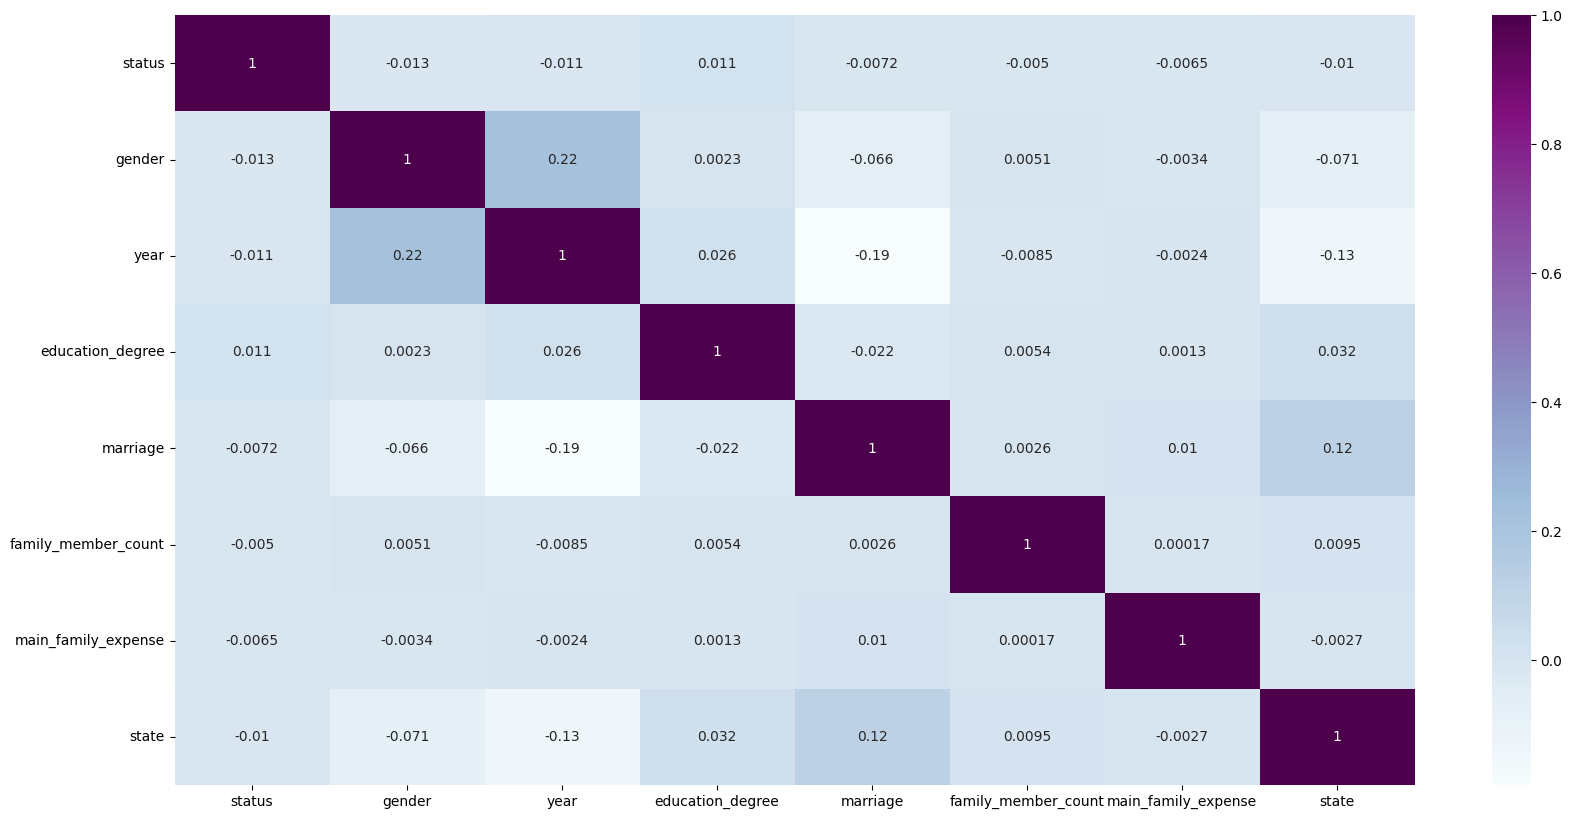

In [43]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=selected.corr()
sns.heatmap(corn,annot=True,cmap="BuPu")

In [44]:
X=selected.drop(columns=["status"])
y=selected["status"]

In [45]:
# scale the DataFrame
scalar=StandardScaler()
X=scalar.fit_transform(X)
X=pd.DataFrame(X)

In [46]:
X.head()

,0,1,2,3,4,5,6
0,0.795448,0.596692,-0.983721,0.453060,-0.006941,-0.048196,-0.670040
1,0.795448,0.364100,-0.983721,0.453060,-0.006941,-0.057976,-0.670040
2,0.795448,1.139407,0.776276,-2.207212,-0.006941,-0.048196,1.492449
3,0.795448,0.441630,0.776276,0.453060,-0.006941,-0.057976,-0.670040
4,0.795448,1.294468,0.776276,0.453060,-0.006936,-0.009076,-0.670040


 Split the dataset

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)

In [48]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(18478, 7) (18478,)
(6160, 7) (6160,)


In [49]:
# this code is to show how much time required to train the model using different algorithms
def timer(start_time= None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour,tmin,round(tsec,2)))

In [51]:
# parameters of all classification algorithms respectively
model_param={    
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,1000]
        }
    },
    'LGBMClassifier':{
        'model':lgb.LGBMClassifier(),
        'params':{
            'max_depth': [20, 30],
            'max_bin':[255,300],                      
            'n_estimators' : [10,100,1000]
        }
    },
    'ExtraTreesClfr':{
        'model':ExtraTreesClassifier(),
        'params':{
            "max_depth": [None],
            "max_features": [8,12],
            "min_samples_split": [10,20,30],
            "bootstrap": [False, True],
            "n_estimators" :[10,100,200],
            "criterion": ["gini"]
        }
    }
}     

In [52]:
start_time=timer(None)
scores=[]
for model_name,mp in model_param.items():
    # Apply GridSearchCV
    rs=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    rs.fit(X,y)
    print( model_name," : successfully execute")
    scores.append({
        'model':model_name, # it'll retrive the best model name
        "best_score":rs.best_score_, # it'll retrive the best accuracy score
        'best_params':rs.best_params_ # it'll retrive the best parameter
    })
timer(start_time)

random_forest  : successfully execute
[LightGBM] [Info] Number of positive: 8694, number of negative: 11016
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 19710, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.441096 -> initscore=-0.236716
[LightGBM] [Info] Start training from score -0.236716
[LightGBM] [Info] Number of positive: 8694, number of negative: 11016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 19710, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.

In [53]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.511852,{'n_estimators': 100}
1,LGBMClassifier,0.556945,"{'max_bin': 255, 'max_depth': 20, 'n_estimator..."
2,ExtraTreesClfr,0.531536,"{'bootstrap': True, 'criterion': 'gini', 'max_..."


In [54]:
# Find the parameter of LGBMClassifier
# rs.best_params_
# rs.best_estimator_
scores[1]

{'model': 'LGBMClassifier',
 'best_score': 0.5569446549492725,
 'best_params': {'max_bin': 255, 'max_depth': 20, 'n_estimators': 10}}

two parts where 90% of data will be use in KFold Cross validation and rest 10% data will be use for sample prediction

In [55]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=21)

In [56]:
# reset the index of x_train
x_train.reset_index(inplace=True)
# drop "index" column
x_train.drop(columns=['index'],axis=1,inplace=True)
x_train.tail()

,0,1,2,3,4,5,6
22169,0.795448,0.596692,0.776276,0.453060,-0.006931,0.030045,-0.670040
22170,0.795448,1.371999,-0.983721,-2.207212,-0.006945,-0.077536,-0.670040
22171,0.795448,0.984345,0.776276,-2.207212,-0.006936,-0.009076,-0.670040
22172,-1.257154,-1.574168,0.776276,-2.207212,-0.006931,0.030045,1.492449
22173,-1.257154,0.674222,0.776276,0.453060,-0.006945,-0.057976,-0.670040


In [57]:
y_train=pd.DataFrame(y_train)
y_train.reset_index(inplace=True)
y_train.drop(columns=['index'],axis=1,inplace=True)
y_train.tail()

,status
22169,1
22170,0
22171,1
22172,0
22173,1


In [58]:
# convert "y_train" dataframe into an array 
y_train=np.array(y_train)

Model Building

In [59]:
# Hide warning
warnings.filterwarnings('ignore')

# Apply KFold
skf=KFold(n_splits=5)
LGBMClf= lgb.LGBMClassifier(max_bin= 255, max_depth = 20, n_estimators = 10)

for train_index,test_index in skf.split(x_train,y_train):
    x_train_kf,x_test_kf,y_train_kf,y_test_kf = x_train.loc[train_index],x_train.loc[test_index],y_train[train_index],y_train[test_index]
    LGBMClf.fit(x_train_kf, y_train_kf)

# Find Accuracy
print("============================================================")
print("Training accuracy of data is :", LGBMClf.score(x_train_kf, y_train_kf))
print("============================================================")
print("Testng accuracy of data is :", LGBMClf.score(x_test_kf, y_test_kf))
print("============================================================")

[LightGBM] [Info] Number of positive: 7804, number of negative: 9935
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 17739, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439935 -> initscore=-0.241427
[LightGBM] [Info] Start training from score -0.241427
[LightGBM] [Info] Number of positive: 7815, number of negative: 9924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 17739, number of used features: 7
[LightGBM] [Info] [binary:

Save the Model

In [52]:
#Saving Scikitlearn models
import joblib
joblib.dump(LGBMClf, "../model/lgbm_credit_risk_analyzer.pkl")

['../model/lgbm_credit_risk_analyzer.pkl']

In [53]:
# load the model
model=joblib.load("../model/lgbm_credit_risk_analyzer.pkl")
model

LGBMClassifier(max_bin=255, max_depth=20, n_estimators=10)

Find Prediction

In [54]:
y_pred=model.predict(x_test)

In [55]:
y_pred

array([0., 1., 1., ..., 1., 0., 0.])

Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)


/home/jasurkhon/.local/share/virtualenvs/fintech-FRh8gAjU/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jasurkhon/.local/share/virtualenvs/fintech-FRh8gAjU/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jasurkhon/.local/share/virtualenvs/fintech-FRh8gAjU/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


In [62]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [63]:
# Evaluate
print("Train Accuracy:", rf.score(x_train, y_train))
print("Test Accuracy:", rf.score(x_test, y_test))

Train Accuracy: 0.5619644628844592
Test Accuracy: 0.5604707792207793


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72      1378
           1       0.80      0.00      0.01      1086

    accuracy                           0.56      2464
   macro avg       0.68      0.50      0.36      2464
weighted avg       0.67      0.56      0.40      2464

Confusion Matrix:
 [[1377    1]
 [1082    4]]


Feature Importance

In [65]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=x_train.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)

   importance
1    0.313415
5    0.248823
4    0.203211
2    0.095271
6    0.048331
0    0.047218
3    0.043731


In [66]:
from sklearn.metrics import roc_auc_score
y_pred_prob = rf.predict_proba(x_test)[:, 1]  # Probabilities for class 1
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

ROC AUC Score: 0.5016578594969088


In [67]:
from sklearn.metrics import roc_curve
# Compute the false positive rate (FPR) 
# and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

In [68]:
# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_pred_prob) 
roc_auc

0.5016578594969088

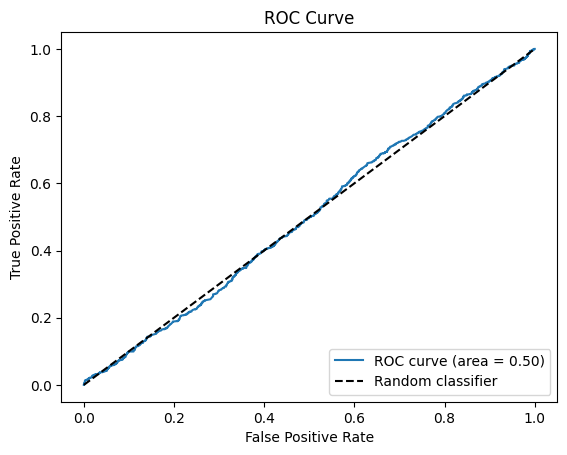

In [69]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()